In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).
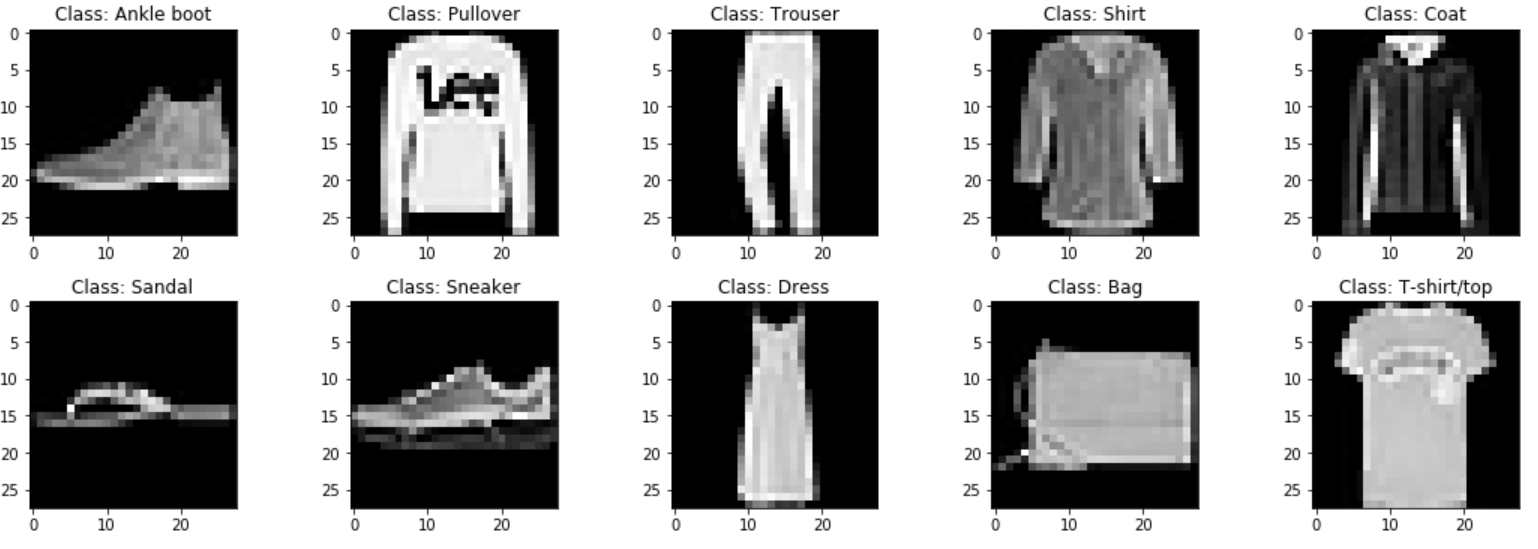

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

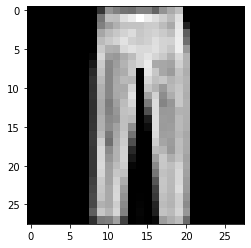

In [6]:
plt.imshow(X_train_full[16],'gray')

### Data Reshape

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [10]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [11]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the model architecture

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

### Architecture
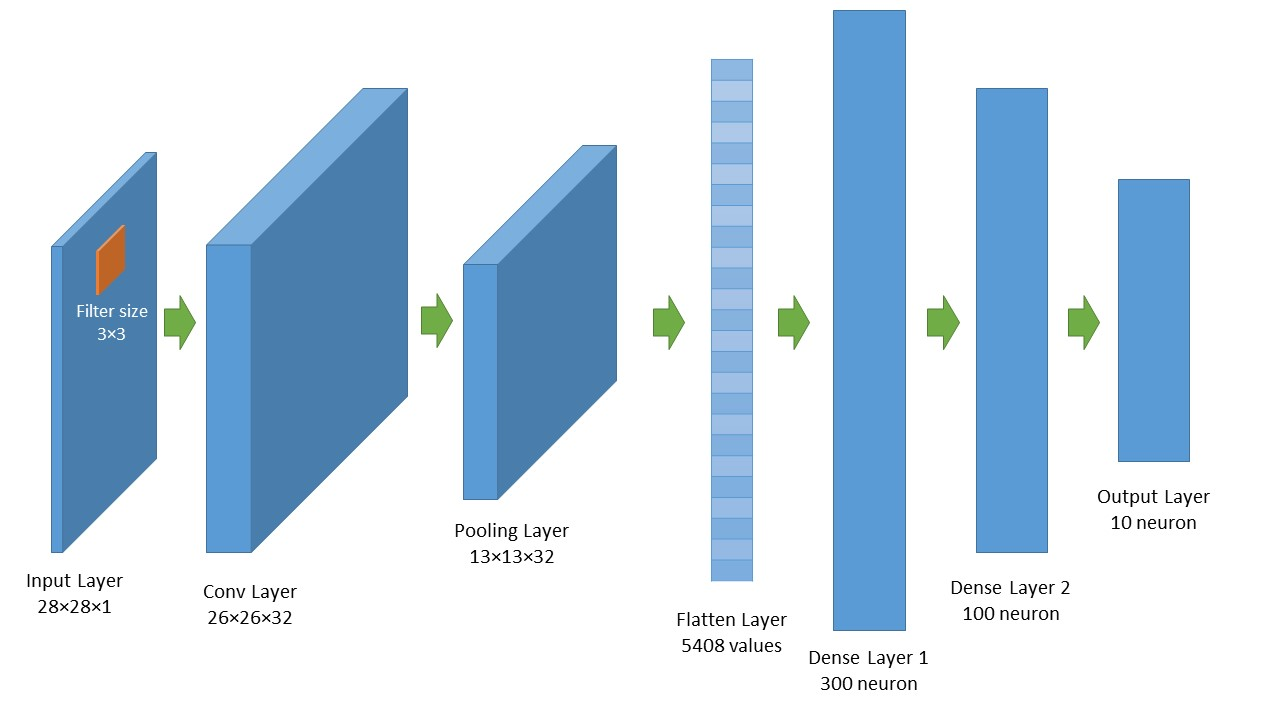

In [13]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'
                                                                                                    , input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [15]:
# import pydot
# import pydotplus
# import graphviz
# import pydot_ng as pydot
# pydot.find_graphviz()

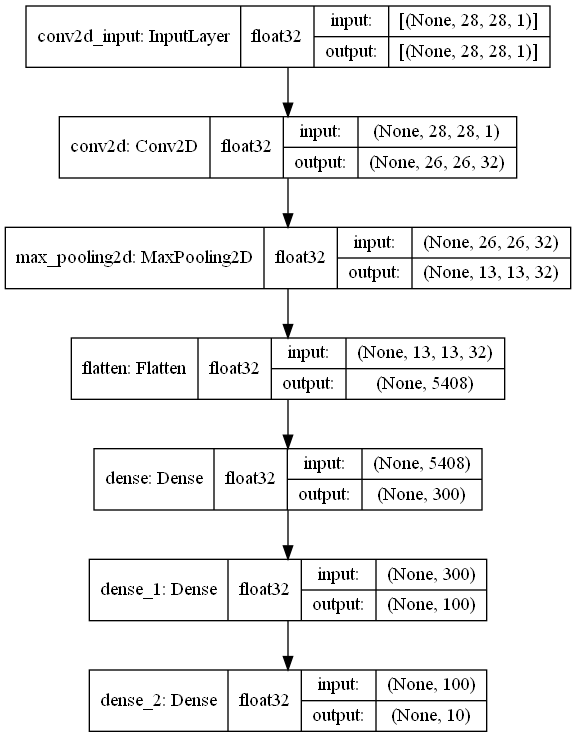

In [16]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_dtype=True)

In [17]:
model.layers

In [18]:
weights , biases = model.layers[3].get_weights()

In [19]:
weights.shape

(5408, 300)

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [22]:
# patience: Number of epochs with no improvement after which training will be stopped.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [23]:
model_history = model.fit(X_train, 
                          y_train, 
                          epochs=100, 
                          batch_size= 64, 
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb]
                          )

Epoch 1/100
860/860 [==============================] - 11s 11ms/step - loss: 1.2808 - accuracy: 0.5728 - val_loss: 0.7500 - val_accuracy: 0.7356
Epoch 2/100
860/860 [==============================] - 6s 7ms/step - loss: 0.5666 - accuracy: 0.7959 - val_loss: 0.4902 - val_accuracy: 0.8204
Epoch 3/100
860/860 [==============================] - 6s 7ms/step - loss: 0.4943 - accuracy: 0.8209 - val_loss: 0.8998 - val_accuracy: 0.7116
Epoch 4/100
860/860 [==============================] - 6s 7ms/step - loss: 0.4546 - accuracy: 0.8387 - val_loss: 0.4136 - val_accuracy: 0.8580
Epoch 5/100
860/860 [==============================] - 6s 7ms/step - loss: 0.4341 - accuracy: 0.8441 - val_loss: 0.4390 - val_accuracy: 0.8460
Epoch 6/100
860/860 [==============================] - 6s 7ms/step - loss: 0.3982 - accuracy: 0.8561 - val_loss: 0.3759 - val_accuracy: 0.8720
Epoch 7/100
860/860 [==============================] - 6s 7ms/step - loss: 0.3822 - accuracy: 0.8650 - val_loss: 0.4095 - val_accuracy: 0.85

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 860}

In [ ]:
model_history.metrics_names

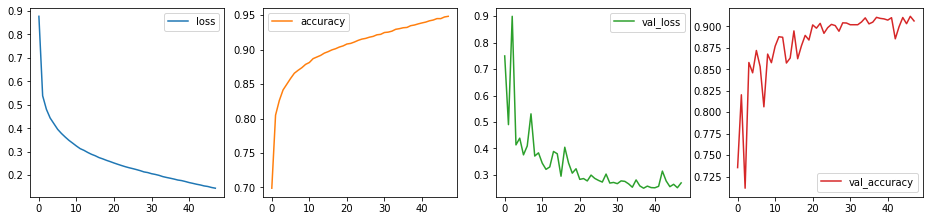

In [26]:
import pandas as pd

# pd.DataFrame(model_history.history).plot(figsize=(10, 5))
pd.DataFrame(model_history.history).plot(figsize=(16, 16), layout=(4, 4), subplots=True)
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
ev = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2605 - accuracy: 0.9041


In [28]:
ev

[0.26045751571655273, 0.9041000008583069]

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

In [29]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label = {"T-shirt/top":0, "Trouser":1, "Pullover":2, "Dress":3, "Coat":4, "Sandal":5, "Shirt":6, "Sneaker":7, "Bag":8, "Ankle boot":9}

def getLabel(n) : 
    for x , y in label.items() : 
        if n == y : 
            return x   

In [30]:
X_new = X_test[50:53]

<ipython-input-33-981102750ceb>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f"13{n+1}")


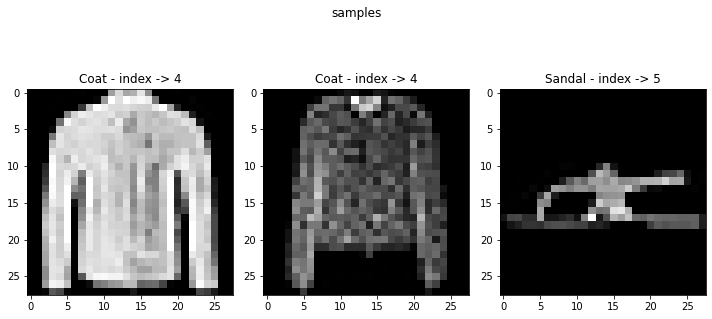

In [33]:
arr = list(range(50,53))

plt.figure(figsize=(10,5))

for n,i in enumerate(arr):
# for n,i in enumerate(np.random.randint(0,len(X_test),3)):
    plt.subplot(f"13{n+1}")
    plt.imshow(X_test[i],'gray')
    plt.title(f"{class_names[y_test[i]]} - index -> {y_test[i]}")

plt.suptitle("samples")
plt.tight_layout()
plt.show()

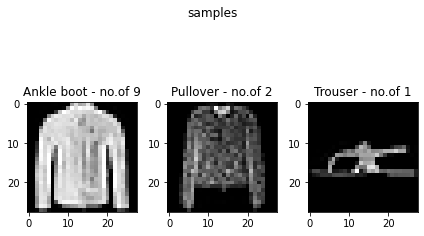

In [32]:
plt.subplot(131)
plt.imshow(X_new[0],'gray')
plt.title(f"{class_names[y_test[0]]} - no.of {y_test[0]}")

plt.subplot(132)
plt.imshow(X_new[1],'gray')
plt.title(f"{class_names[y_test[1]]} - no.of {y_test[1]}")

plt.subplot(133)
plt.imshow(X_new[2],'gray')
plt.title(f"{class_names[y_test[2]]} - no.of {y_test[2]}")

plt.suptitle("samples")
plt.tight_layout()
plt.show()

In [34]:
y_pred_all = model.predict(X_test)
y_pred_all

array([[1.93358119e-06, 3.40413834e-07, 4.12347674e-07, ...,
        1.47007895e-03, 2.05057120e-04, 9.97861087e-01],
       [6.96245661e-06, 9.73184033e-11, 9.99911189e-01, ...,
        3.60483713e-12, 2.34636932e-09, 2.73640815e-11],
       [4.51128237e-08, 9.99997497e-01, 6.27997598e-10, ...,
        1.83926749e-10, 6.79323542e-11, 2.30475708e-12],
       ...,
       [3.92976217e-04, 8.01126809e-09, 9.30488342e-04, ...,
        3.08636942e-07, 9.98289764e-01, 7.57868346e-09],
       [6.78513743e-07, 9.99971747e-01, 8.95453240e-08, ...,
        8.92196965e-08, 1.73133881e-08, 2.60013326e-08],
       [1.93598302e-04, 1.59034935e-05, 5.38405788e-04, ...,
        1.48133775e-02, 9.33368132e-03, 8.89855510e-05]], dtype=float32)

In [35]:
y_pred_all_val = np.argmax(y_pred_all, axis=1)
# y_pred_all_val222 = np.max(y_pred_all, axis=1)
# y_pred_all_val222
y_pred_all_val

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

5191
5734
6265
<ipython-input-36-ef8c3ff5dd22>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f"13{n+1}")


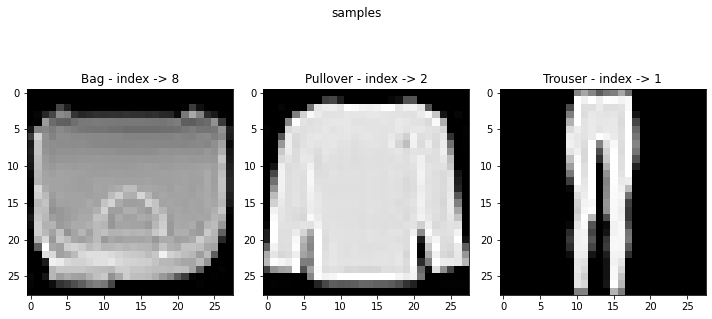

In [36]:
plt.figure(figsize=(10,5))

# for n,i in enumerate(arr):
for n,i in enumerate(np.random.randint(0,len(X_test),3)):
    print(i)
    plt.subplot(f"13{n+1}")
    plt.imshow(X_test[i],'gray')
    # plt.title(f"{class_names[np.argmax(y_pred_all[i])]} - index -> {np.argmax(y_pred_all[i])}")
    plt.title(f"{class_names[y_pred_all_val[i]]} - index -> {y_pred_all_val[i]}")

plt.suptitle("samples")
plt.tight_layout()
plt.show()

In [37]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.2 , 0.  , 0.43, 0.  , 0.37, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = model.predict_classes(X_new)
y_pred

e:\UDEMY_3\Computer Vision && Image Processing\LAB\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4, 4, 5], dtype=int64)

In [39]:
y_pred_new = np.argmax(model.predict(X_new), axis=1)
y_pred_new

array([4, 4, 5], dtype=int64)

In [40]:
np.array(class_names)[y_pred]

array(['Coat', 'Coat', 'Sandal'], dtype='<U11')

In [41]:
y_test[50:53]

array([4, 4, 5], dtype=uint8)

In [42]:
np.array(class_names)[y_test[50:53]]

array(['Coat', 'Coat', 'Sandal'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


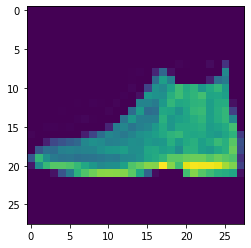

In [43]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [44]:
predicted_classes = model.predict_classes(X_test)

correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]

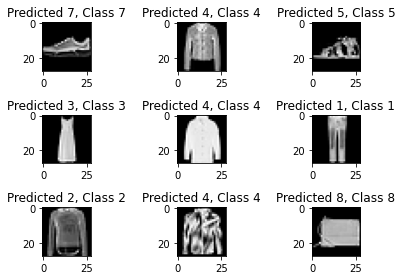

In [45]:
for i, index in enumerate(correct[9:18]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[index], y_test[index]))
plt.tight_layout()
plt.show()

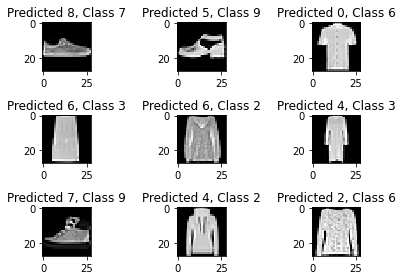

In [46]:
for i, index in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[index], y_test[index]))
plt.tight_layout()
plt.show()

In [59]:
target_names = [f"{i}- Class {val}" for i,val in enumerate(class_names)]
target_names

['0- Class T-shirt/top',
 '1- Class Trouser',
 '2- Class Pullover',
 '3- Class Dress',
 '4- Class Coat',
 '5- Class Sandal',
 '6- Class Shirt',
 '7- Class Sneaker',
 '8- Class Bag',
 '9- Class Ankle boot']

In [47]:
len(incorrect)

959

In [48]:
len(correct)

9041

In [50]:
from sklearn.metrics import classification_report
target_names = [f"{i}- Class {val}" for i,val in enumerate(class_names)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

                      precision    recall  f1-score   support

0- Class T-shirt/top       0.88      0.83      0.85      1000
    1- Class Trouser       0.99      0.98      0.99      1000
   2- Class Pullover       0.85      0.86      0.85      1000
      3- Class Dress       0.91      0.91      0.91      1000
       4- Class Coat       0.83      0.86      0.85      1000
     5- Class Sandal       0.96      0.98      0.97      1000
      6- Class Shirt       0.74      0.75      0.74      1000
    7- Class Sneaker       0.97      0.92      0.94      1000
        8- Class Bag       0.97      0.98      0.98      1000
 9- Class Ankle boot       0.94      0.97      0.96      1000

            accuracy                           0.90     10000
           macro avg       0.90      0.90      0.90     10000
        weighted avg       0.90      0.90      0.90     10000



# save and restoring

In [51]:
model.save('cnn_fashion_mnist.h5')

In [2]:
# pwd

In [3]:
# cd path

In [54]:
del model

In [55]:
keras.backend.clear_session()

## load

In [56]:
model = keras.models.load_model("cnn_fashion_mnist.h5")

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [58]:
y_pred_new = np.argmax(model.predict(X_new), axis=1)
y_pred_new

array([4, 4, 5], dtype=int64)

# Architecture - Pooling vs No Pooling

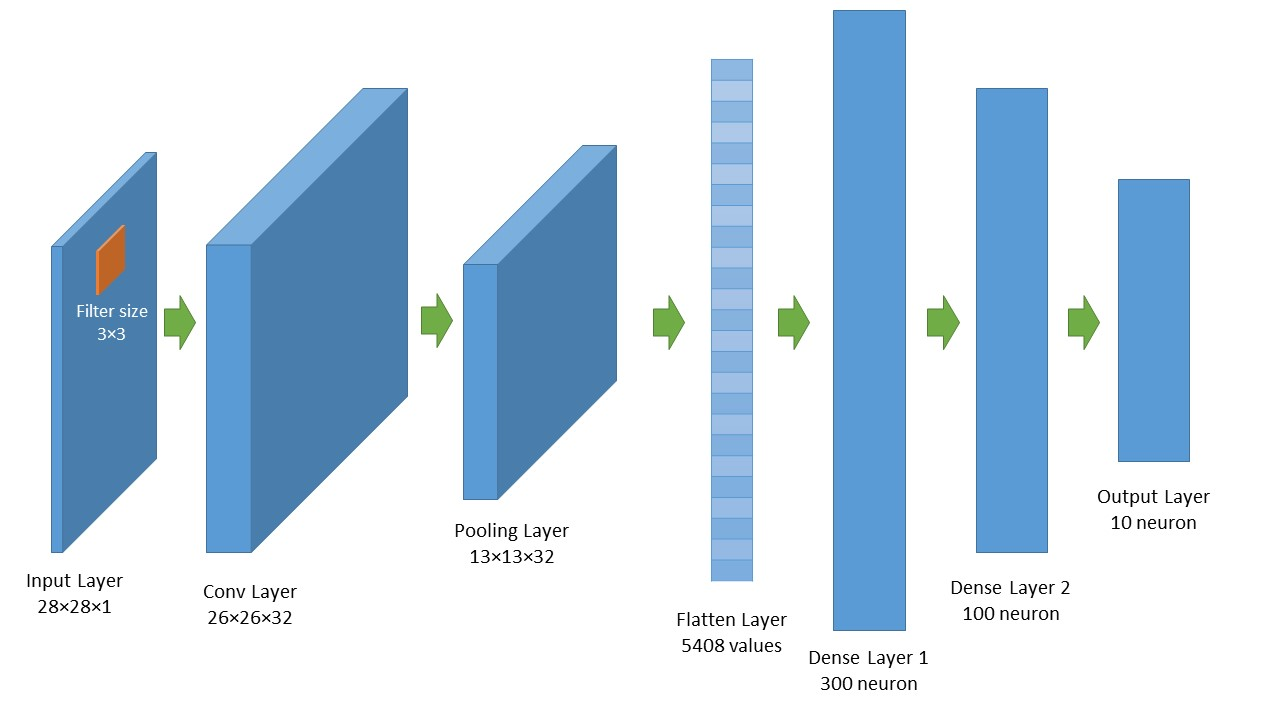

# Pooling vs No Pooling

In [14]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [15]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [16]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
model_history_a = model_a.fit(X_train, 
                              y_train, 
                              epochs=3,
                              batch_size= 64,
                              validation_data=(X_valid, y_valid)
                              )

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 31s 565us/sample - loss: 0.8755 - accuracy: 0.7029 - val_loss: 0.5964 - val_accuracy: 0.7848
Epoch 2/3
55000/55000 [==============================] - 31s 556us/sample - loss: 0.5388 - accuracy: 0.8046 - val_loss: 0.5042 - val_accuracy: 0.8196
Epoch 3/3
55000/55000 [==============================] - 30s 554us/sample - loss: 0.4782 - accuracy: 0.8278 - val_loss: 0.4865 - val_accuracy: 0.8252


In [19]:
model_history_b = model_b.fit(X_train, 
                              y_train, 
                              epochs=3,
                              batch_size= 64,
                              validation_data=(X_valid, y_valid)
                              )

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.7138 - accuracy: 0.7523 - val_loss: 0.5047 - val_accuracy: 0.8188
Epoch 2/3
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.4899 - accuracy: 0.8232 - val_loss: 0.4656 - val_accuracy: 0.8342
Epoch 3/3
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.4367 - accuracy: 0.8425 - val_loss: 0.4794 - val_accuracy: 0.8248
